# Week 3 - Univariate Analysis

## Please run the cells of the notebook as you get to them while reading

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from rich import print
import matplotlib.pyplot as plt

# 1. Lesson: Bar charts and univariate graphs

Let's make a dataset (in this case, just a series) which is weighted to have more small values than large values.  By squaring a random number between 0 and 1, we ensure that half (those whose initial value is below 0.5) are below 0.25, while the other half are between 0.25 and 1.  This means that most of the values are small, and it's more interesting than analyzing a perfectly uniform dataset.  This kind of trick - transforming one random variable to get another - can generate a variety of random datasets for you.  We then multiply by 100 to get a number between 0 and 100.

In [2]:
np.random.seed(0)
lesson_series = np.round(np.random.random(size = 1000)**2 * 100, 2)
lesson_series[0:10] # check the first ten values.  Are they mostly on the small side?

array([30.12, 51.15, 36.33, 29.69, 17.95, 41.72, 19.15, 79.53, 92.86,
       14.7 ])

In [3]:
import seaborn as sns

In the plot below, you can see a histogram of the values in the series.  For some reason, it decided to have exactly 11 bins (we allowed it to choose the number of bins.)  Most values - about 300 of them - are between 0 and 9, and the next most likely bin is between 9 and 18.  Since there are 1000 values, the total of the bars should be 1000.

<Axes: ylabel='Count'>

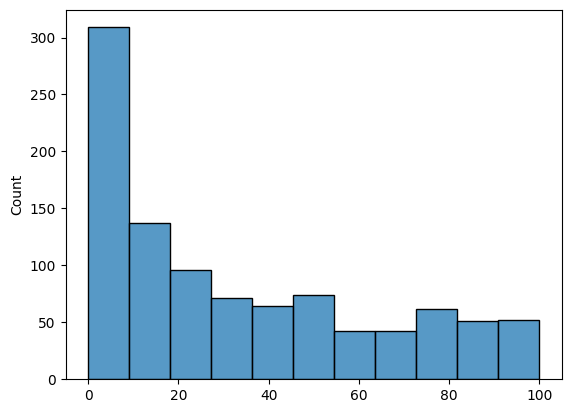

In [4]:
sns.histplot(lesson_series)

There are 11 bins or bars, a number which by default is chosen by seaborn.  We can reproduce this manually to (hopefully) see the same values as numbers. I'm not sure that this second histogram is guaranteed to be exactly the same, but it looks the same to me:

In [5]:
np.histogram(lesson_series, bins = 11)[0]

array([309, 137,  96,  71,  64,  74,  42,  42,  62,  51,  52])

What happens if we override seaborn and choose the number of bins ourselves?  We could choose a much larger number of bins:

<Axes: ylabel='Count'>

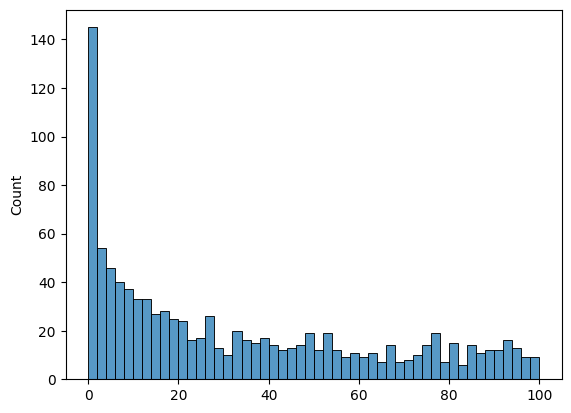

In [6]:
sns.histplot(lesson_series, bins = 50)

One disadvantage of this 50 bin picture is that the outliers are worse.  That is, the graph wobbles up and down a bit more randomly.  That's because there are fewer values in each bin, so there's more of a role for chance to take effect.  If we had many more data points and/or fewer bins, we could get rid of this wobble.

<Axes: ylabel='Count'>

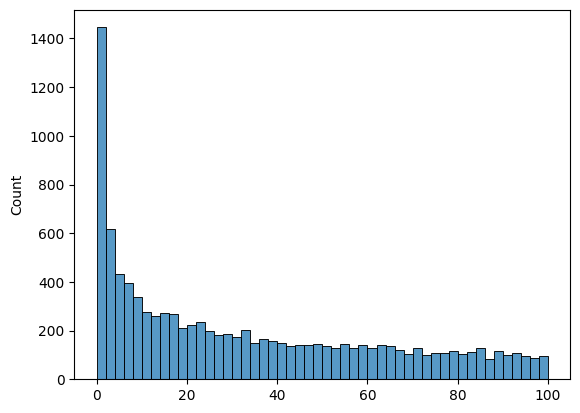

In [7]:
lesson_series_2 = np.round(np.random.random(size = 10000)**2 * 100, 2)
sns.histplot(lesson_series_2, bins = 50)

Here you can see that because the number of bins is the same as in the second graph above, but for more data, the histogram is a smoother graph.  Why does more data make for a smoother graph?  Something for you to think about.  I said it's because a larger number of data points in each bin reduces the role of chance - but why is that?

Here is a KDE (Kernel Density Estimate) plot.  It's just the same histogram, but drawn smoothly.  The KDE plot doesn't have a "number of bins."  It's always drawn the same way.  In this case, because of the smoothness of the curve, it seems that x-values less then zero and above 100 are still plotted, even though there were no such values in the dataset.  This seems like a drawback of the KDE plot, especially if the viewer is unprepared for this aspect of the plot.

<Axes: ylabel='Density'>

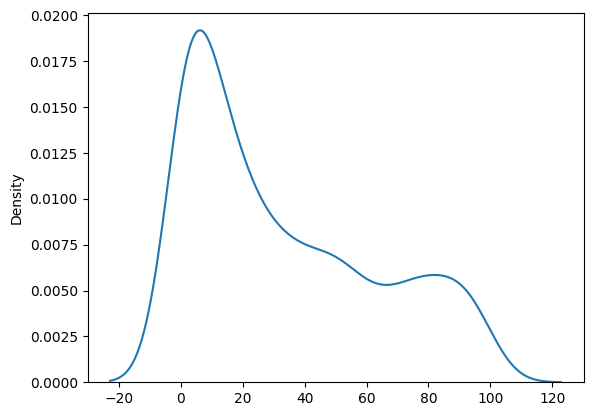

In [8]:
sns.kdeplot(lesson_series)

We could also draw a box plot.  This time, to construct the data I used a fourth power rather than squaring, with only 100 data points, so that the points are even more concentrated toward the small numbers.  It turns out that this will create a more interesting boxplot.  The top and bottom edges of the box are the 75th and 25th percentile, respectively, and the top and bottom "whiskers" show a larger range which is a multiple of 1.5 times the the box height.  (The bottom whisker cannot be see because it's pushed against the bottom of the graph.)  The filled-in box shows that half of the values are between about 0 and 30 on the y-axis.  Is that what you'd expect?  The 25th and 75th percentile of the original uniform random variable are at 0.25 and 0.75.  Taken to the fourth power and multiplied by 100 (remember, that's how we constructed our sample), that's 0.25\*\*4 * 100 = 0.4 and 0.75\*\*4 * 100 = 32.  It's plausible that those are the height of the bottom and top of the box.  We can see that a small number of samples are above the top whisker; they are shown as individual dots.

<Axes: >

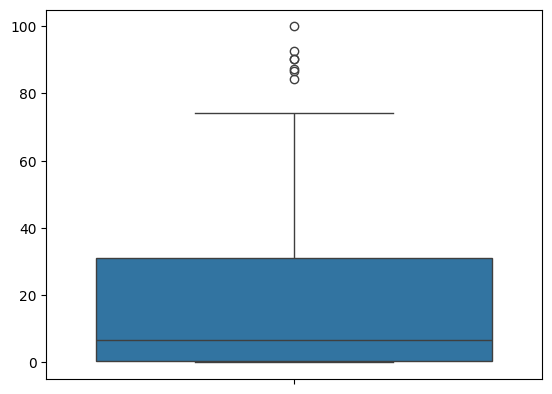

In [9]:
lesson_series_3 = np.round(np.random.random(size = 100)**4 * 100, 2)
sns.boxplot(lesson_series_3)

If we go back to the original lesson_series with the squared values, there will be two whiskers, because it isn't so strongly weighted toward small values:

<Axes: >

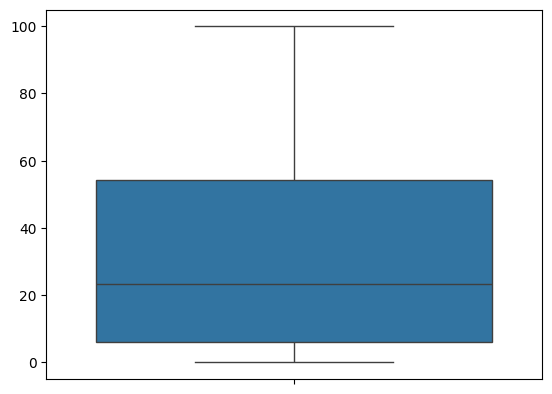

In [10]:
sns.boxplot(lesson_series)

Going back to the fourth power series, another histogram variant is the violin plot.  This simply combines a kde plot (turned on its side and forming two side of the violin) with a boxplot:

<Axes: >

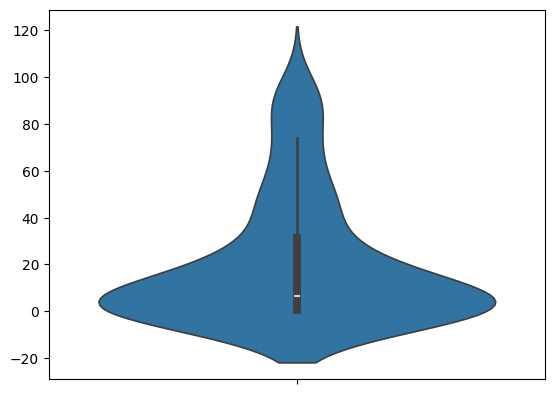

In [11]:
sns.violinplot(lesson_series_3)

Finally, a swarm plot shows the histogram (turned on its side and doubled, as with the violin plot) but showing each individual point.

<Axes: >

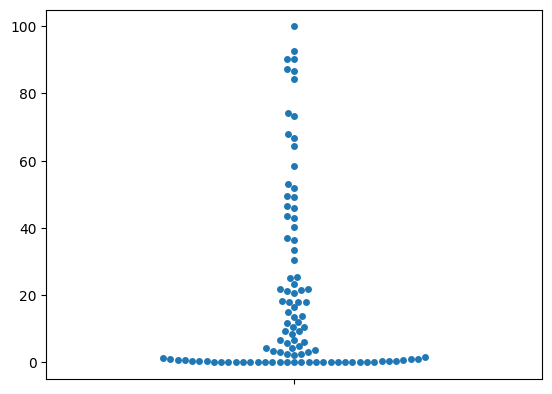

In [12]:
sns.swarmplot(lesson_series_3)

___

# 2. Weekly graph question

Below are a histogram and table representation of the same data.  A species of bird is being analyzed, and each individual's body length in inches has been measured.

**Please write a short explanation of the pros and cons of these two representations.  Which would you choose?  How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?**

___

#### **Answer**

**Table**

A table is a great way to represent data for subject matter experts and individuals who are already familiar with the dataset. This format allows them to drill down into the exact values, compare categories, and extract precise insights.

However, tables can be difficult to interpret for those unfamiliar with the data. Without prior knowledge, it may be challenging to spot patterns or trends, as the format lacks a visual component. While tables allow us to quantify differences between categories, they do not provide an intuitive sense of the magnitude of those differences.

Because of these drawbacks, I would not recommend using a table for an audience that is not already well-acquainted with the data. Additionally, the table itself could be improved by using more descriptive column titles rather than generic labels like “count,” “minval,” and “maxval,” which make it difficult to understand what’s being measured. Lastly, I’m unsure whether the index column serves a meaningful purpose—if not, it might be better to remove or rename it for clarity.

**Histogram**

A histogram is a powerful tool for understanding how data is distributed. It can quickly answer key questions such as:

- Are there tails in the data? 
- Is the data unimodal / multimodal? 
- How spread out / concentrated is the dataset? 

Some drawbacks are that we are inherently limited by the bins that we create for the histogram -- If our bins are very large then they might oversimplify and hide important details. Conversely, if we make the bins very small, then they become overly sensitive to noise. 

Additionally, while histograms offer a nice visual overview of the data, they make it very difficult to really 'drill down' into the data and see the specific values for data points.

In this case, they might be a good tool to use as part of a larger exploratory data analysis effort, or be a good tool for getting a quick picture of what's going on in a dataset, but they might not be the best tool for an audience that is alreay highly familiar with the data as they might not reveal much new information. 

As for editing the histogram below, I would like to see a label for the x axis. I know that we are supposedly measuring birds but I'm unsure of what 3, 4, or 5 are refering to in reference to this. (Inches?). Additionally a Title and a Legend that label what we're measuring would be very helpful. Additionally, I would play around and maybe increase the bin number by 2 or so to get an idea of how the data is distributed. 

In [13]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 10000
data = np.random.normal(size = num_data) + 6
df = pd.DataFrame(data.T, columns = ["data"])

In [14]:
histnums = np.histogram(df["data"])
histcounts = histnums[0]
histmins = histnums[1][0:-1]
histmaxes = histnums[1][1:]

In [15]:
pd.DataFrame(np.array([histcounts, histmins, histmaxes]).T, columns = ["count", "minval", "maxval"])

,count,minval,maxval
0,10.0,2.259899,3.014075
1,110.0,3.014075,3.768252
2,579.0,3.768252,4.522428
3,1710.0,4.522428,5.276604
4,2833.0,5.276604,6.030780
5,2688.0,6.030780,6.784956
6,1479.0,6.784956,7.539132
7,487.0,7.539132,8.293308
8,97.0,8.293308,9.047484
9,7.0,9.047484,9.801660


<Axes: ylabel='Frequency'>

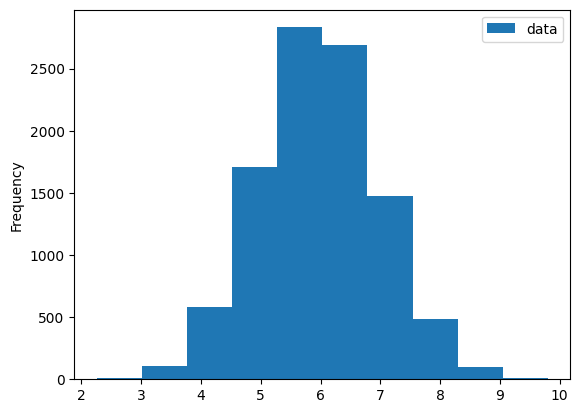

In [16]:
df.plot.hist()

___

# 3. Homework - Amusement Park Rides

Now let's imagine we have some data about how many times different visitors to an amusement park used each ride, as well as how much money they spend at the amusement park.  Each sample represents a single visit by a single visitor on a given date.

In [17]:
num_visits = 10000
np.random.seed(0)

In [18]:
df = pd.DataFrame(columns = ["VisitDate"])

In [19]:
start = datetime(2010, 1, 1)
end = datetime(2024, 1, 1)
numdays = (end - start).days
random_days = np.random.randint(0, numdays, size = num_visits)
s = start + pd.to_timedelta(random_days, unit='D')
s = s.sort_values()
df["VisitDate"] = s

In [20]:
df["IsAdult"] = np.random.choice([True, True, False], size = num_visits)

In [21]:
df["MartianRide"] = np.random.choice([0] * 8 + [1] * 3 + [2] * 3 + [3] * 1 + [10], size = num_visits) * df["IsAdult"]

In [22]:
df["TeacupRide"] = np.random.choice([0] * 2 + [1] * 5 + [2] * 3 + [5] * 2, size = num_visits) * ~df["IsAdult"]

In [23]:
df["RiverRide"] = np.random.choice([0] * 8 + [1] * 3 + [2] * 2, size = num_visits) * df["IsAdult"] + np.random.randint(1, 5, size = num_visits) * ~df["IsAdult"]

In [24]:
df["MoneySpent"] = np.round(np.random.random(size = num_visits)**2 * 100, 2)

In [25]:
df.iloc[0:5]

,VisitDate,IsAdult,MartianRide,TeacupRide,RiverRide,MoneySpent
0,2010-01-01,False,0,1,4,10.30
1,2010-01-01,True,3,0,0,38.77
2,2010-01-01,True,0,0,0,79.34
3,2010-01-01,True,0,0,1,87.84
4,2010-01-02,False,0,1,2,18.65


___

#### **1. Find the mean, median, and mode for how many times visitors rode each ride.  See Week 1 for Google advice on this.**
Taking the directions to mean the mean median and mode on a 'per visitor' basis. 

In [26]:

martianMean = df['MartianRide'].mean()
martianMedian = df['MartianRide'].median()
martianMode = df['MartianRide'].mode()
martianMode = df['MartianRide'].mode().iloc[0] if not df['MartianRide'].mode().empty else "No Mode"


print(f"[bold]Martian Ride Stats:[/bold] \n Mean: {martianMean:.2f} \n Median: {martianMedian:.2f} \n Mode: {martianMode}")

TeacupMean = df['TeacupRide'].mean()
TeacupMedian = df['TeacupRide'].median()
TeacupMode = df['TeacupRide'].mode()
TeacupMode = df['TeacupRide'].mode().iloc[0] if not df['TeacupRide'].mode().empty else "No Mode"


print(f"[bold]TeaCup Ride Stats:[/bold] \n Mean: {TeacupMean:.2f} \n Median: {TeacupMedian:.2f} \n Mode: {TeacupMode}")

RiverMean = df['RiverRide'].mean()
RiverMedian = df['RiverRide'].median()
RiverMode = df['RiverRide'].mode()
RiverMode = df['RiverRide'].mode().iloc[0] if not df['RiverRide'].mode().empty else "No Mode"


print(f"[bold]River Ride Stats:[/bold] \n Mean: {RiverMean:.2f} \n Median: {RiverMedian:.2f} \n Mode: {RiverMode}")


Martian Ride Stats: 
 Mean: 0.91 
 Median: 0.00 
 Mode: 0

TeaCup Ride Stats: 
 Mean: 0.59 
 Median: 0.00 
 Mode: 0

River Ride Stats: 
 Mean: 1.20 
 Median: 1.00 
 Mode: 0

____

#### **2. Use groupby() to find the mean, median, and mode for how many times each ride was ridden on each given day.**

Suggested Google search or ChatGPT prompt: 
I first tried: "How do I use groupby to find the mean over each day in my DataFrame?" but Google didn't help me.

Then I tried: "How do I find the mean over each date in a dataframe?"  Sometimes, you have to try multiple searches.

This gives me a very helpful site, where someone is doing the same thing we are:

https://stackoverflow.com/questions/40788530/how-to-calculate-mean-of-some-rows-for-each-given-date-in-a-dataframe

In [27]:
ridersbydate = df.groupby('VisitDate').sum()


martianMean = ridersbydate['MartianRide'].mean()
martianMedian = ridersbydate['MartianRide'].median()
martianMode = ridersbydate['MartianRide'].mode()
martianMode = ridersbydate['MartianRide'].mode().iloc[0] if not ridersbydate['MartianRide'].mode().empty else "No Mode"


print(f"[bold]Martian Ride Stats:[/bold] \n Mean: {martianMean:.2f} \n Median: {martianMedian:.2f} \n Mode: {martianMode}")

TeacupMean = ridersbydate['TeacupRide'].mean()
TeacupMedian = ridersbydate['TeacupRide'].median()
TeacupMode = ridersbydate['TeacupRide'].mode()
TeacupMode = ridersbydate['TeacupRide'].mode().iloc[0] if not ridersbydate['TeacupRide'].mode().empty else "No Mode"


print(f"[bold]TeaCup Ride Stats:[/bold] \n Mean: {TeacupMean:.2f} \n Median: {TeacupMedian:.2f} \n Mode: {TeacupMode}")

RiverMean = ridersbydate['RiverRide'].mean()
RiverMedian = ridersbydate['RiverRide'].median()
RiverMode = ridersbydate['RiverRide'].mode()
RiverMode = ridersbydate['RiverRide'].mode().iloc[0] if not ridersbydate['RiverRide'].mode().empty else "No Mode"


print(f"[bold]River Ride Stats:[/bold] \n Mean: {RiverMean:.2f} \n Median: {RiverMedian:.2f} \n Mode: {RiverMode}")

Martian Ride Stats: 
 Mean: 2.06 
 Median: 1.00 
 Mode: 0

TeaCup Ride Stats: 
 Mean: 1.33 
 Median: 0.00 
 Mode: 0

River Ride Stats: 
 Mean: 2.73 
 Median: 2.00 
 Mode: 0

**Cite:** Mode Code Debugging facilitated by ChatGPT:
- https://chatgpt.com/share/67a60534-74b0-800f-a32a-027d4f84af56

___

#### **3. Find the standard deviation and variance of the count for each ride.**
*Again, I am assuming this means the standard deviation and Variance count of each ride per customer*

Suggested Google search or ChatGPT prompt: "How do I find the standard deviation of a Series in pandas documentation?" and similar query for variance.

I included the word "documentation" because this task likely involves applying one single function for standard deviation and another for variance, so I expected that I could find a single documentation page for each that would cover my needs.  I get these:

https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.Series.var.html

https://pandas.pydata.org/docs/reference/api/pandas.Series.std.html

In [28]:
MartianStd = df['MartianRide'].std()
MartianVar = df['MartianRide'].var()
print(f"[bold]Martian Ride St.Dev and Varience:[/bold] \n Standard Deviation: {MartianStd:.2f} \n Varience: {MartianVar:.2f}")

TeacupSTD = df['TeacupRide'].std()
TeacupVAR = df['TeacupRide'].var()
print(f"[bold]TeaCup Ride St.Dev and Varience:[/bold] \n Sandard Deviation: {TeacupSTD:.2f} \n Varience: {TeacupVAR:.2f}")

RiverSTD = df['RiverRide'].mean()
RiverVar = df['RiverRide'].median()
print(f"[bold]River Ride St.Dev and Varience:[/bold] \n Standard Deviation: {RiverSTD:.2f} \n Varience: {RiverVar:.2f} ")



Martian Ride St.Dev and Varience: 
 Standard Deviation: 2.08 
 Varience: 4.32

TeaCup Ride St.Dev and Varience: 
 Sandard Deviation: 1.23 
 Varience: 1.52

River Ride St.Dev and Varience: 
 Standard Deviation: 1.20 
 Varience: 1.00

___

#### **4. Find the 90th percentile count for each ride.  That is, if the customers are ordered by their number of rides, and there are 100 customers, how many rides does the 90th person take?  There is a function in pandas that easily does this calculation.**

Suggested Google search or ChatGPT prompt: "How do I find a percentile value for a Series in pandas documentation?"

This time, I will let you find the page!  Hint: it's not actually called the "percentile" function.

In [29]:
Martian90 = df['MartianRide'].quantile(0.9)
print(f"[bold]Martian Ride 90th Percentile:[/bold] \n {Martian90:.2f}")

Teacup90 = df['TeacupRide'].quantile(0.9)
print(f"[bold]TeaCup Ride 90th Percentile:[/bold] \n {Teacup90:.2f}")

River90 = df['RiverRide'].quantile(0.9)
print(f"[bold]River Ride 90th Percentile:[/bold] \n {River90:.2f}")

Martian Ride 90th Percentile: 
 2.00

TeaCup Ride 90th Percentile: 
 2.00

River Ride 90th Percentile: 
 3.00

____

#### **5. Plot a histogram of the ride count, using each day as data element as you did in #2.  Use both the total ride count for each day as well as, separately, the mean ride count for each day.**

Suggested Google search or ChatGPT prompt: "How do I plot a histogram for a Series in pandas?"

I found this: https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.hist.html

Note: the "by" keyword will not help you plot a count for each day; if you try to use it for this, it will try to draw a separate histogram for each day.

You've already learned how to find the mean ride count for each day.  Can you use a similar idea to find the total ride count for each day?

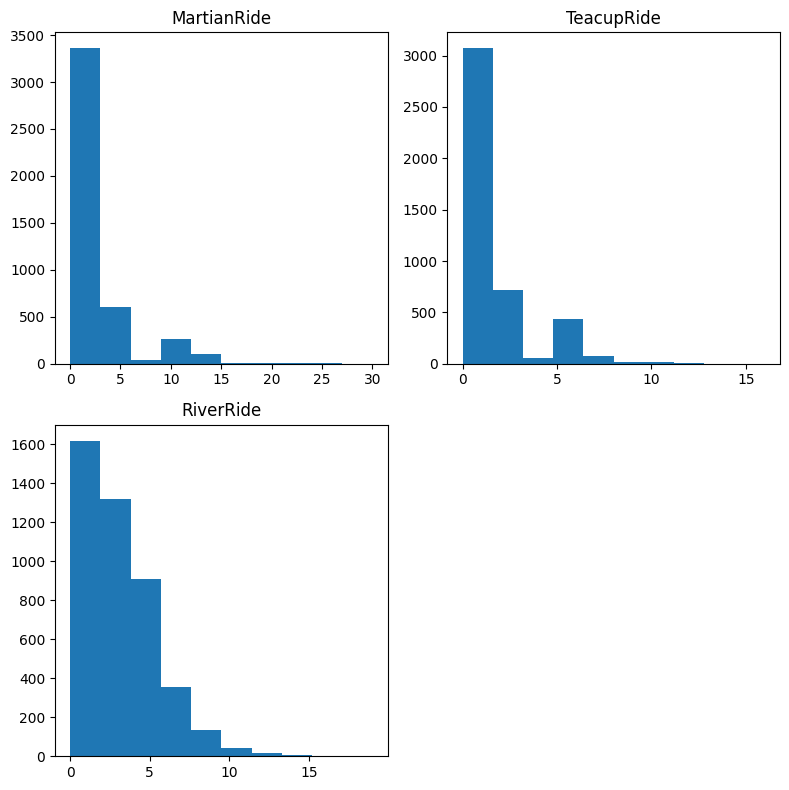

In [30]:
# ridersbydate already uses groupby to get the total number of riders on a given date. From there I'm just Filtering out the columns we need and plotting them. 

ridersbydateplot = ridersbydate[['MartianRide', 'TeacupRide', 'RiverRide']]

_ = ridersbydateplot.hist(figsize=(8,8), grid=False, bins=(10))
plt.xlim(0)
plt.ylim(0)
plt.tight_layout()
plt.show()

____

#### **6. Make a bar chart showing the total number of Adult and Child participants.**

Try to formulate your own Google search or ChatGPT prompt.

Here's one page I found:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

which shows some interesting examples for you to use.  I recommend clicking on the first, basic example to see how to use the function.

You can also look up the pandas documentation, which might lead to an entirely different method.

In terms of 'how many Adults and how many children visited the theme park, we have:

In [31]:
""" 
First, let's rename some columns to make the columns more readable -- Then let's
change the values of IsAdult True or False to Adult or Child -- Again, for legibility. 
"""
problem6 = df.groupby('IsAdult').count()
problem6 = problem6.reset_index()
problem6 = problem6.rename(columns={'MartianRide': 'Number of Participants', 'IsAdult': 'Age of Participants'})
problem6['Age of Participants'] = problem6['Age of Participants'].replace({True: 'Adult', False: 'Child'})
problem6[['Age of Participants', 'Number of Participants']]

,Age of Participants,Number of Participants
0,Child,3375
1,Adult,6625


Text(0, 0.5, 'Number of Participants')

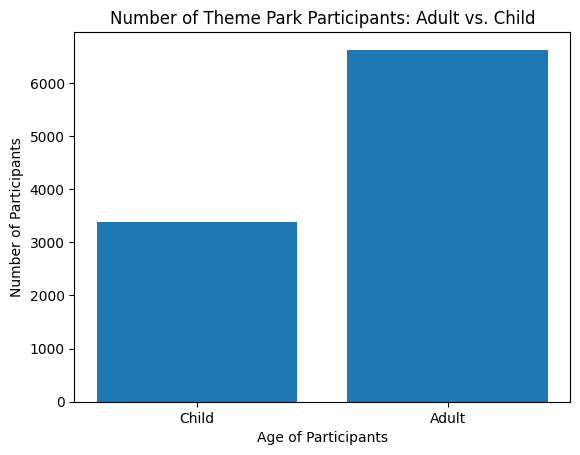

In [32]:
_ = plt.bar(problem6['Age of Participants'], problem6['Number of Participants'])
plt.title('Number of Theme Park Participants: Adult vs. Child')
plt.xlabel('Age of Participants')
plt.ylabel('Number of Participants')

And then in terms of 'how many participants were there on each ride (knowing that a participant can ride the ride more than once). 



**Note that no Adults took the Teacup Ride and no Children took the Martian Ride**

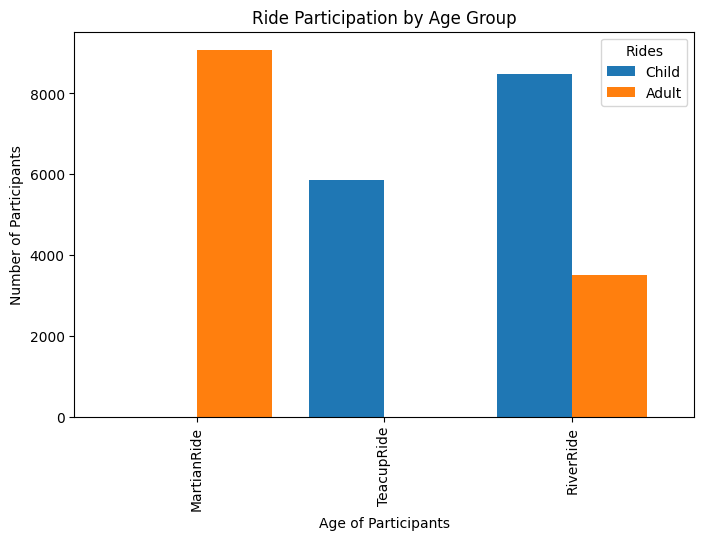

In [33]:
problem6b = df.groupby('IsAdult').agg({
    'MartianRide': 'sum',
    'TeacupRide': 'sum',
    'RiverRide': 'sum'
})

problem6b = problem6b.rename(columns={'IsAdult': 'Age of Participants'})
problem6b['Age of Participants'] = problem6['Age of Participants'].replace({True: 'Adult', False: 'Child'})
problem6b = problem6b.reset_index()
problem6b = problem6b.drop(columns=('IsAdult'), axis=1)
problem6b.set_index('Age of Participants', inplace=True)
problem6b = problem6b.T


_ = problem6b.plot(kind='bar', figsize=(8,5), width=0.8)

plt.xlabel('Age of Participants')
plt.ylabel('Number of Participants')
plt.title('Ride Participation by Age Group')

plt.legend(title='Rides')
plt.show()

**Note that no Adults took the Teacup Ride and no Children took the Martian Ride**

___

#### **7. Make a stacked bar chart showing how many Adult and Child visits took the River Ride, with the x-axis showing the number of rides and with two stacked bars (adult, child).  That is, there could be a column for the number of Adults (and Children) who took 0 rides, 1 ride, 2 rides, and so on.**

Try to formulate your own Google search or ChatGPT prompt.

For me, the pandas documentation was easier than the matplotlib documentation.

* If you use the pandas method, you might have to one-hot encode the IsAdult column.  You might want names for the new columns other than True and False.  Use df.join or pd.concat to attach the pd.get_dummies table you've created, and then groupby the RiverRide value.

* You will need to end up with a small table with two columns (IsAdult True and False) and an index (RiverRide) as well as a small number of rows (the values of RiverRide)

* That said, if you can come up with another approach, it's fine.

Cite for ChatGPT: 
- https://chatgpt.com/share/67a64ae7-66dc-800f-9c13-246e16ecdb7e

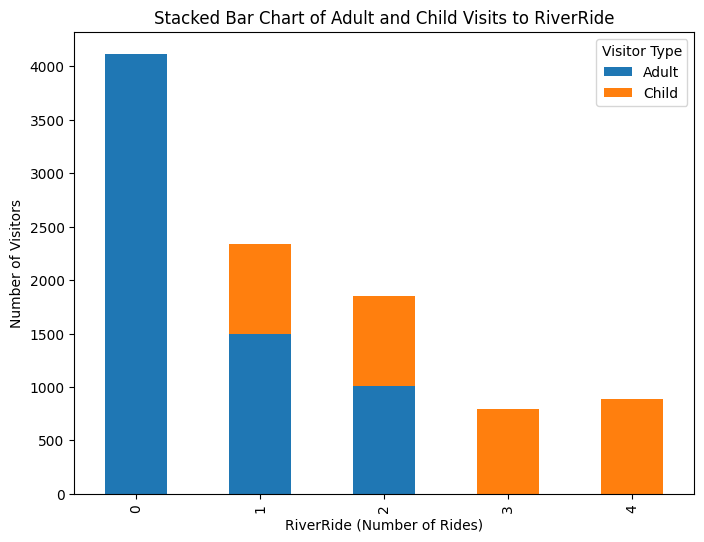

In [34]:
problem7 = df.copy()
df_encoded = pd.get_dummies(problem7['IsAdult']).rename(columns={True: 'Adult', False: 'Child'})
problem7 = problem7.join(df_encoded)
summary = problem7.groupby('RiverRide')[['Adult', 'Child']].sum()
summary.reset_index()

# Plot stacked bar chart
summary.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('RiverRide (Number of Rides)')
plt.ylabel('Number of Visitors')
plt.title('Stacked Bar Chart of Adult and Child Visits to RiverRide')
plt.legend(title='Visitor Type')
plt.show()


My first attempt was this Pivot Table

In [35]:

# problem7 = df[['RiverRide', 'IsAdult']].copy()
# problem7['RiverRide'] = problem7['RiverRide'].astype(int)


# problem7_pivot = problem7.pivot_table(
#     values='RiverRide',   
#     index='RiverRide',      
#     columns='IsAdult',  
#     aggfunc='count',      
#     fill_value=0         
# )
# display(problem7_pivot)


___

#### **8. Other tasks**

Use seaborn (import seaborn as sns) to create a kernel density estimation (kde) plot.  Here is a tutorial you can read about seaborn:

https://seaborn.pydata.org/tutorial/introduction.html

Seaborn often makes nicer looking graphs than pandas or matplotlib.

Now use seaborn to make a swarm plot, a violin plot, and a box plot.

Which plots are the best for showing this data?

___

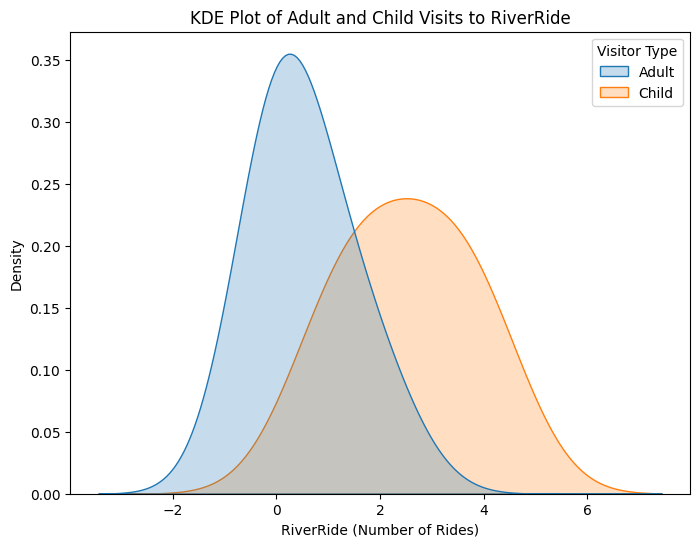

In [36]:

# Convert summary DataFrame from wide to long format
summary_long = summary.reset_index().melt(id_vars='RiverRide', var_name='Visitor Type', value_name='Count')

# Create KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=summary_long, x='RiverRide', hue='Visitor Type', weights='Count', fill=True, common_norm=False)

# Labels and Title
plt.xlabel('RiverRide (Number of Rides)')
plt.ylabel('Density')
plt.title('KDE Plot of Adult and Child Visits to RiverRide')

# Show the plot
plt.show()

For the following, I did some sampling of the data because I didn't think that summary_long was translating well to good visualizations for the following plots. I figured the context of the question was to use each of the plots to visualize the data overall instead of the specific summary_long aggregated statistic and then talk about the merits of each. 

<Axes: xlabel='IsAdult', ylabel='RiverRide'>

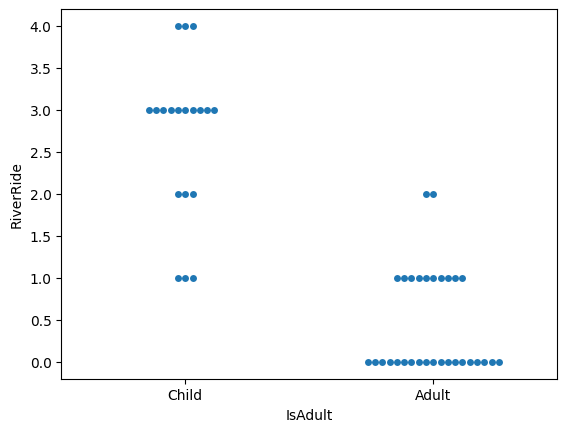

In [37]:
sample_df = df.sample(50, random_state=42)
sample_df['IsAdult'] = sample_df['IsAdult'].replace({True: 'Adult', False: 'Child'})


sns.swarmplot(data=sample_df, x='IsAdult', y='RiverRide')

Text(0.5, 1.0, 'Violin Plot for RiverRide Frequency')

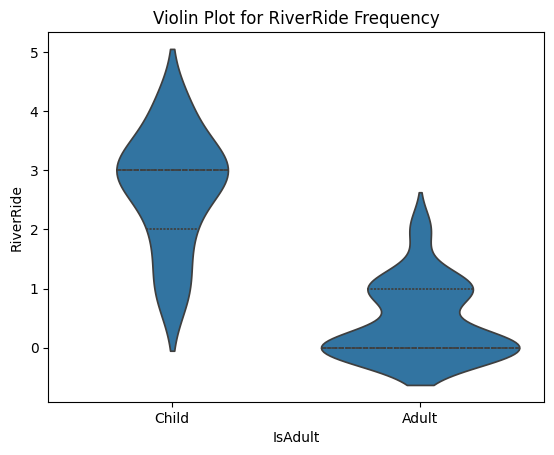

In [38]:
sns.violinplot(data=sample_df, x='IsAdult', y='RiverRide', inner="quartile")
plt.title("Violin Plot for RiverRide Frequency")

Text(0.5, 1.0, 'Box Plot -- Visits for RiverRide')

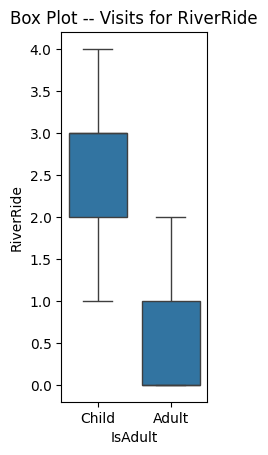

In [39]:
plt.subplot(1, 3, 3) 
sns.boxplot(data=sample_df, x='IsAdult', y='RiverRide')
plt.title("Box Plot -- Visits for RiverRide")

#### **Which plot is best**

For the following, I did some sampling of the data because I didn't think that summary_long was translating well to good visualizations for the following plots. I figured the context of the question was to use each of the plots to visualize the data overall instead of the specific summary_long aggregated statistic and then talk about the merits of each. 

So in this particular instance, I think that the violin plot does the best job of representing this data as it can show the relative quartile distributions of the data like the box plot can, with the added benefit of showing the frequency as weill. (which in this case better shows that the majority of adults rode the river ride 0 times.). I don't like the KDE plot in this circumstance because the smoothing that is inherent to KDE plots made the plot dip into 'negative' territory which doesn't make sense in the context of adults and children riding amusement park rides. 

As for the swarm plot, I think that it is very similar in style to the violin plot but because the counts are in descrete integers (you cannot ride a ride 1.5 times, generally), the gaps make it harder to interpret. 

____

# 4. Storytelling With Data graph

Try to make a scatterplot using amusement park dataset that is similar to the one on page 45, where the two axes are the Teacup Ride count and the River Ride count.  If you want to see individual dots and not a dense swarm of dots, you'll have to cut the dataset down to a small number of points (say, 100 points or so).  You can remove the other points, for instance, and focus on the first 100 points.

Here are some things you could do (you don't have to do all of them):

* Draw a dashed line that roughly separates the adult from child points.

* Draw the points in the adult vs. child region of the graph in different colors.

* Choose the right size and number of dots to make the graph look good.

* Write a word that appears on the dashed line (like AVG in the plot on page 45).

If there are any other graphs in the Storytelling With Data chapter that look interesting, and you want more practice, you can try to reproduce them too.

In [40]:
sample2_df = df.sample(100, random_state=42)
sample2_df['IsAdult'] = sample2_df['IsAdult'].replace({True: 'Adult', False: 'Child'})
sample2_df[sample2_df['IsAdult'].str.contains('Adult')]

,VisitDate,IsAdult,MartianRide,TeacupRide,RiverRide,MoneySpent
6340,2018-10-23,Adult,0,0,1,20.30
576,2010-11-02,Adult,1,0,1,20.20
5202,2017-03-23,Adult,1,0,2,13.06
6363,2018-11-04,Adult,0,0,2,32.83
439,2010-08-11,Adult,1,0,0,25.23
...,...,...,...,...,...,...
9238,2022-12-04,Adult,0,0,0,37.06
1056,2011-07-02,Adult,2,0,0,67.87
3787,2015-04-20,Adult,0,0,1,0.76
7825,2020-11-15,Adult,10,0,0,99.88


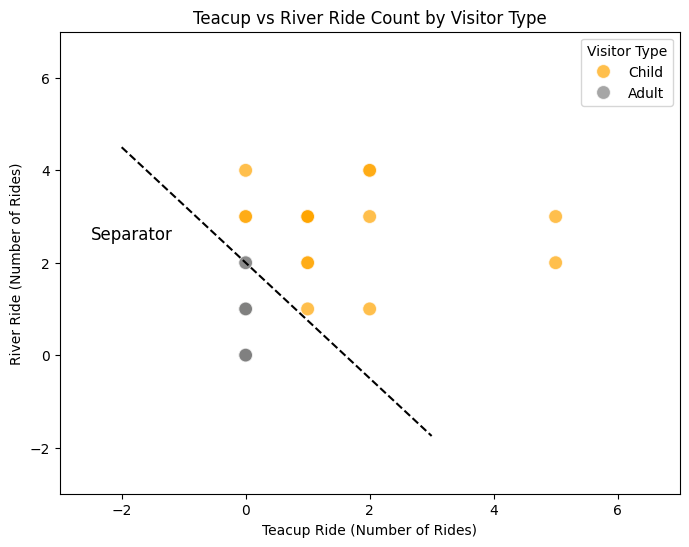

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=sample_df,
    y='RiverRide',
    x='TeacupRide',
    hue='IsAdult',        
    palette={'Adult': 'grey', 'Child': 'orange'}, 
    s=100,               
    alpha=0.7            
)

x_vals = np.linspace((sample2_df['TeacupRide'].min()-2), (sample2_df['TeacupRide'].max()-2), 100)
y_vals = -1.25 * x_vals + 2  
plt.plot(x_vals, y_vals, linestyle='dashed', color='black')
plt.text(-2.5, 2.5, 'Separator', fontsize=12, color='black')


plt.xlim(-3, 7)
plt.ylim(-3, 7)
plt.xlabel("Teacup Ride (Number of Rides)")
plt.ylabel("River Ride (Number of Rides)")
plt.title("Teacup vs River Ride Count by Visitor Type")
plt.legend(title="Visitor Type")

plt.show()